### The dataset
The data source for this logistic  regression is the UCI ML Repository: https://www.kaggle.com/datasets/ashydv/housing-dataset. <br> The original dataset has been modified by removing the 'name' column because it is irrelevant to the analyses. An additional 9 columns have been removed due to high multicollinearity. No rows have been removed. 
The parkinsons dataset used in this code file has 16 variables, including one target variable, status, and 15 predictors. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/Users/veeksha_work/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/veeksha_work/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/veeksha_work/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading the csv file
df = pd.read_csv("parkinsons.data", header=0)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# How many rows and columns are in the dataset?
df.shape

(195, 24)

#### Correlation Matrices for Assumption 3

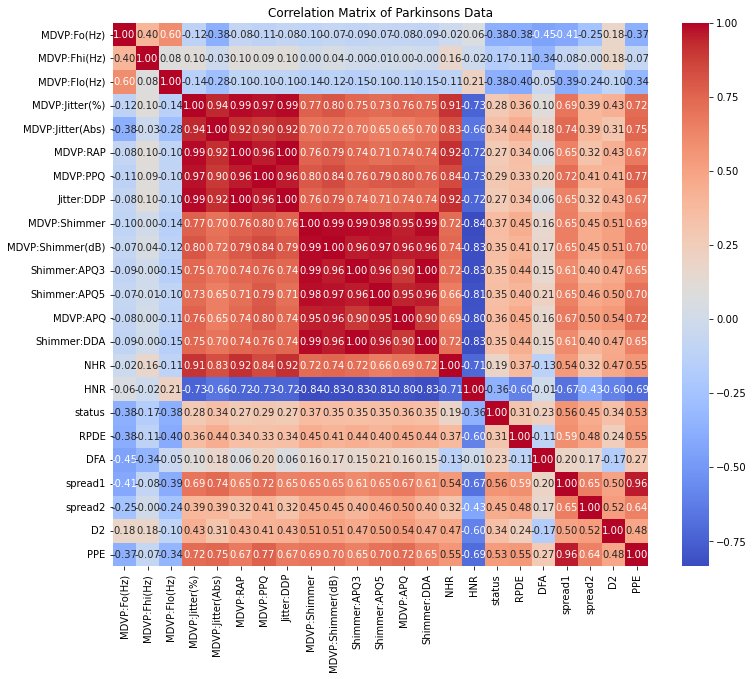

In [4]:
# Calculate the correlation matrix for Assumption5. Multicollinearity
corrdf = df.drop(['name'], axis=1)
correlation_matrix = corrdf.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Matrix of Parkinsons Data')
plt.show()

In [5]:
# Drop columns with high multicollinearity - Assumption5. Multicollinearity
corrdf2 = corrdf.drop(['MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)',
                       'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA','PPE'], axis=1)

In [6]:
# Which columns are left?
corrdf2.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2'],
      dtype='object')

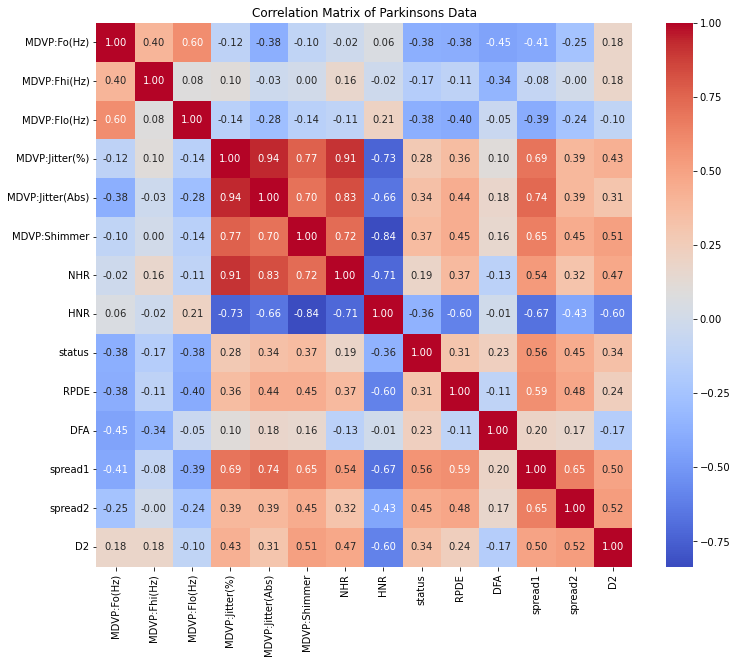

In [7]:
# Build a new correlation matrix for Assumption5. Multicollinearity
correlation_matrix = corrdf2.corr()

plt.figure(figsize=(12, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Matrix of Parkinsons Data')
plt.show()

#### Linearity of Independent Variables with Log-Odds for Assumption 4

/Users/veeksha_work/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


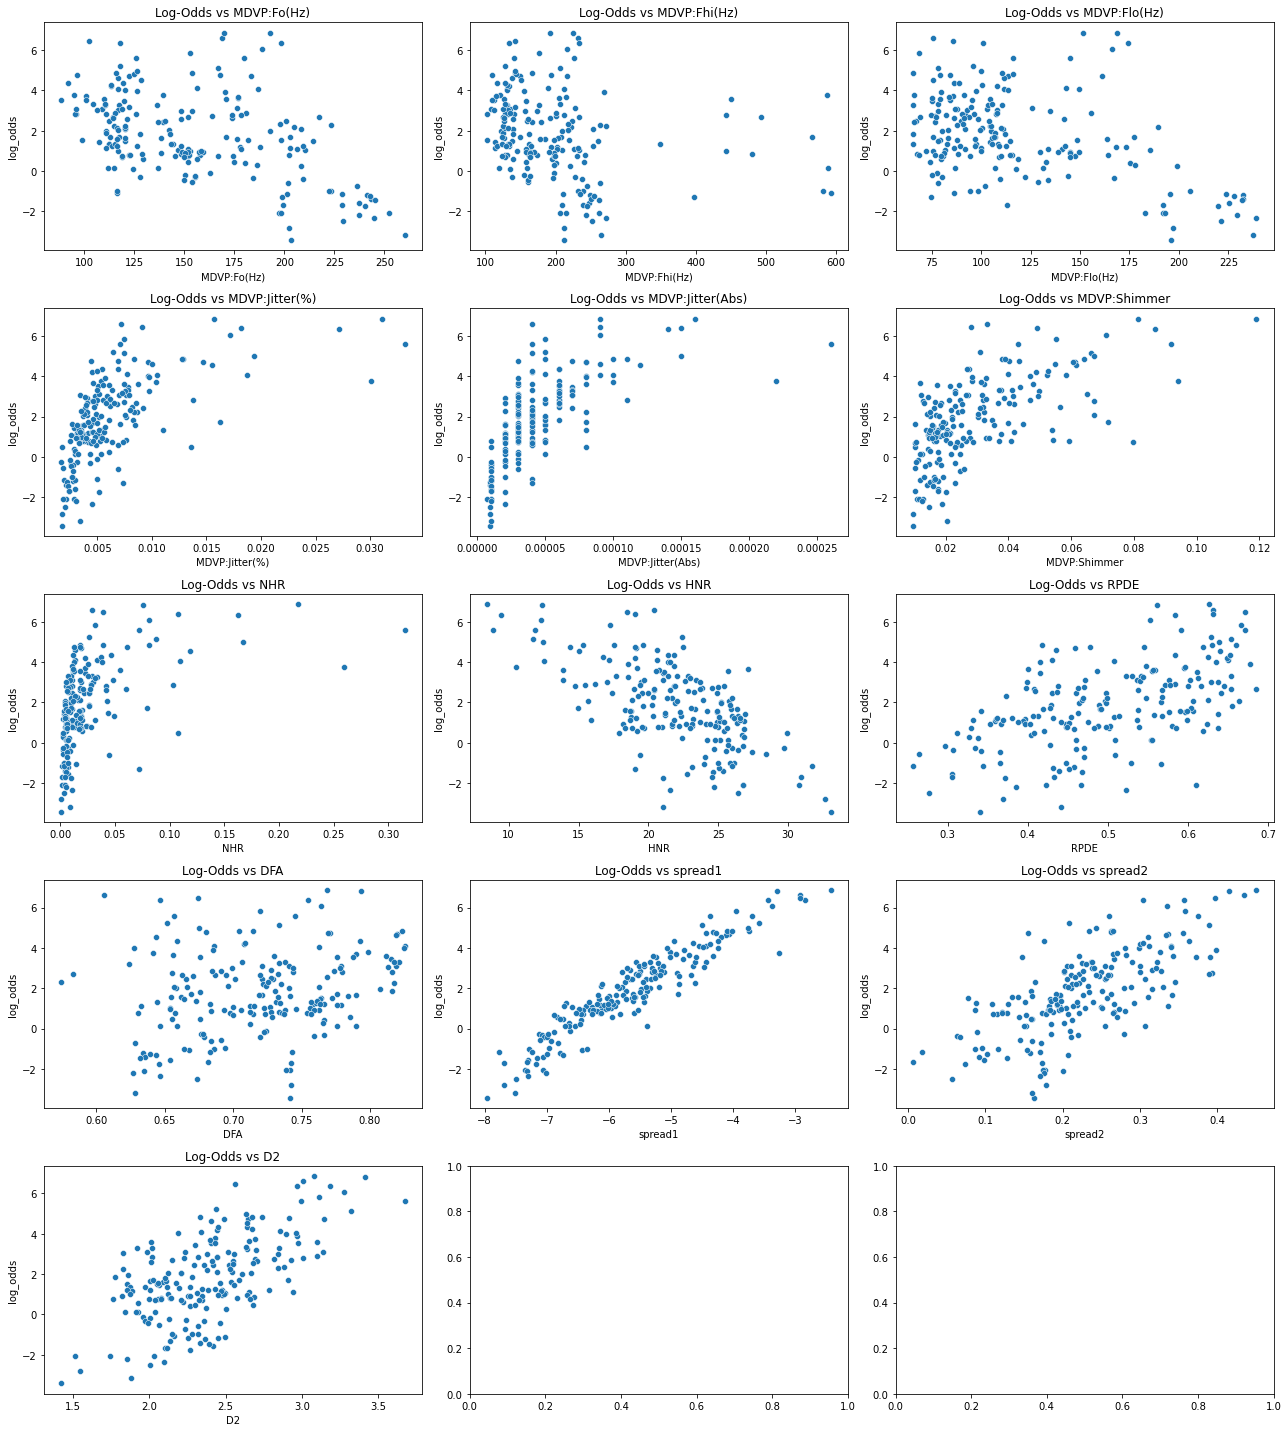

In [8]:
# Split data
columns = corrdf2[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2']]
X_train, X_test, y_train, y_test = train_test_split(columns, corrdf2['status'], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Compute log-odds for all features
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)
corrdf2['probability'] = log_reg.predict_proba(columns)[:, 1]
corrdf2['log_odds'] = np.log(corrdf2['probability'] / (1 - corrdf2['probability']))

# Plot log-odds vs each independent variable
fig, axes = plt.subplots(5, 3, figsize=(18, 20))  # Adjust grid size
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.scatterplot(x=corrdf2[col], y=corrdf2['log_odds'], ax=axes[i])
    axes[i].set_title(f"Log-Odds vs {col}")

plt.tight_layout()
plt.show()

In [9]:
lindf = corrdf2

/Users/veeksha_work/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/veeksha_work/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/veeksha_work/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


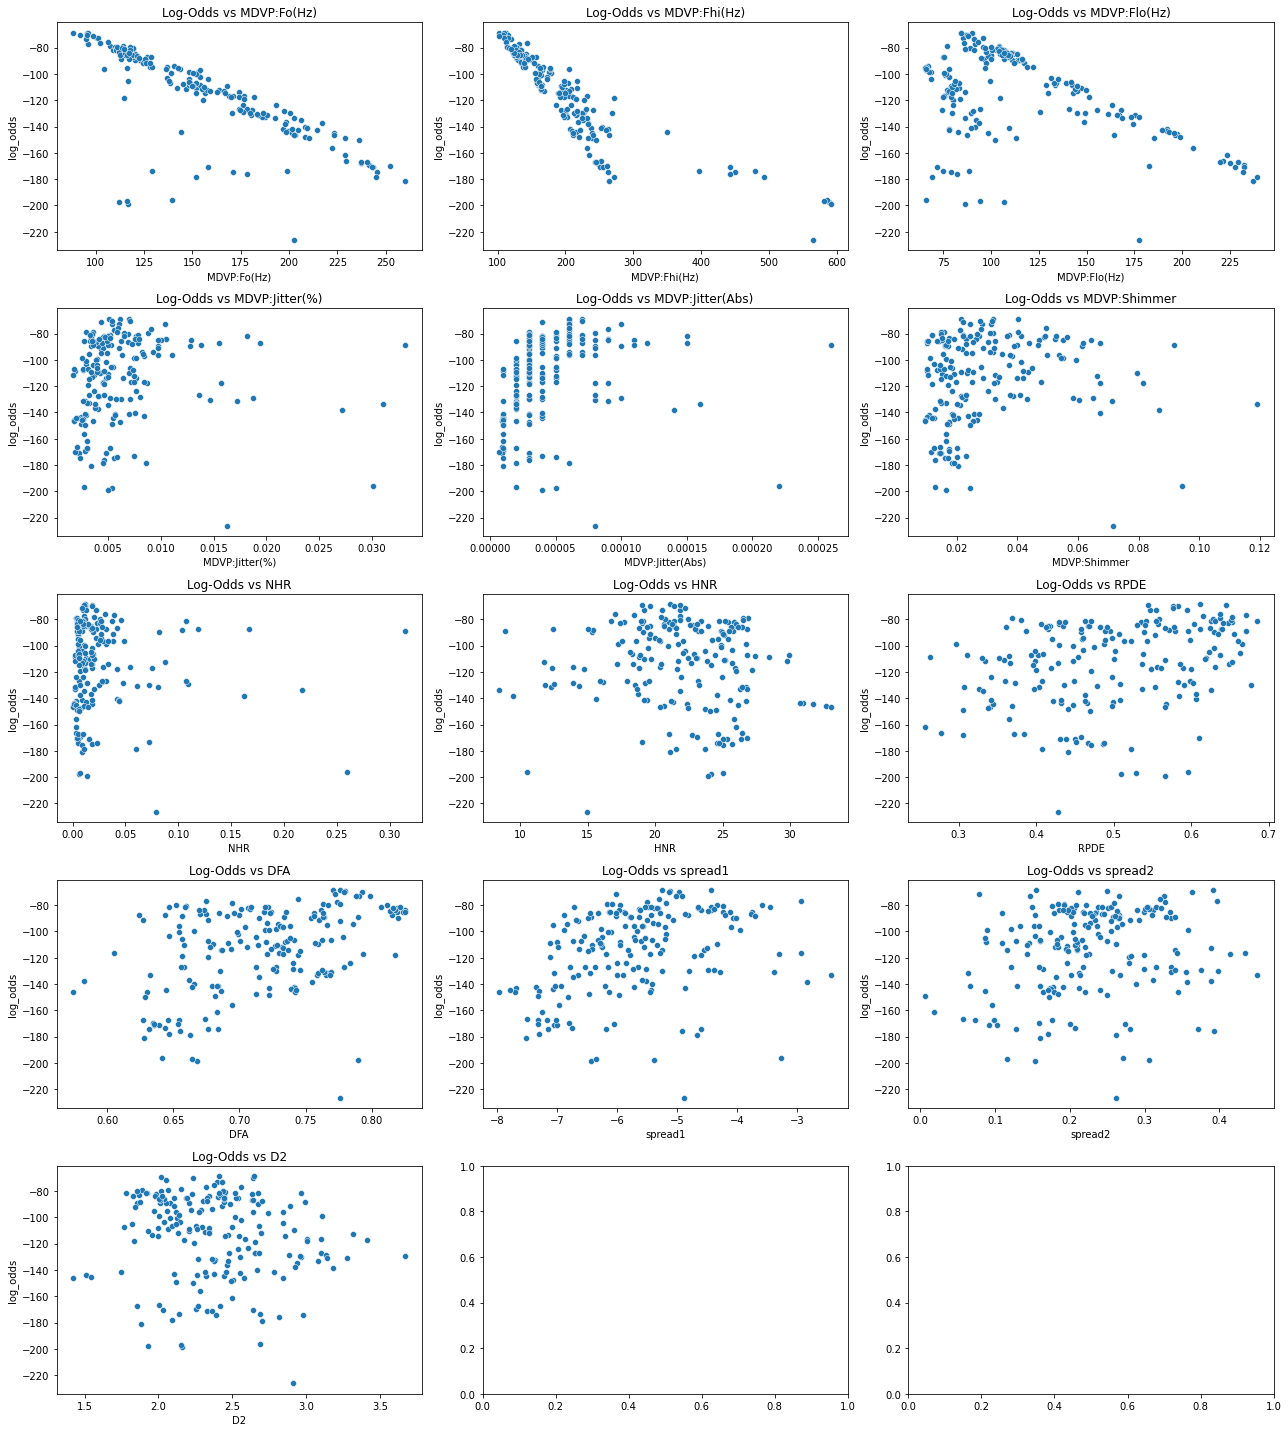

In [10]:
# Split data
X_lin = lindf[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:Shimmer', 'NHR', 'HNR', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2']]
y_lin = lindf[['status']]

# Standardize features
scaler = StandardScaler()
X_lin_scaled = scaler.fit_transform(X_lin)

# Fit Logistic Regression
model = LogisticRegression()
model.fit(X_lin_scaled, y_lin)

# Compute log-odds for all features
log_reg = LogisticRegression() 
log_reg.fit(X_lin_scaled, y_lin)
lindf['probability'] = log_reg.predict_proba(columns)[:, 1]
lindf['log_odds'] = np.log(lindf['probability'] / (1 - lindf['probability']))

# Plot log-odds vs each independent variable
fig, axes = plt.subplots(5, 3, figsize=(18, 20))  # Adjust grid size
axes = axes.flatten()

for i, col in enumerate(X_lin):
    sns.scatterplot(x=lindf[col], y=lindf['log_odds'], ax=axes[i])
    axes[i].set_title(f"Log-Odds vs {col}")

plt.tight_layout()
plt.show()

#### Class Balance for Assumption 5

In [11]:
df2 = corrdf2
df2['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

### Building the Model

In [12]:
# Features (X) - all relevant columns except outcome "status"
X = df2.drop(columns=["status"])  

# Target (y) - the "status" column
y = df2["status"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
X_train.shape

(156, 15)

#### Using SciKit Learn

In [14]:
# Initialize and train the model 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Manually Coded

In [16]:
# Add intercept column (1s) to the design matrix
design_m = np.hstack([np.ones((X_train.shape[0], 1)), X_train])   

# Scale features for better optimization (excluding intercept)
design_m[:, 1:] = scaler.fit_transform(design_m[:, 1:])

# Initialize coefficients
beta_v = np.zeros(design_m.shape[1])

In [17]:
# Compute the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
# Compute the log-likelihood for logistic regression with L2 regularization.
def log_likelihood(X, y, beta, lambda_reg=0.1):
    z = np.dot(X, beta)
    p = sigmoid(z)
    
    # to Avoid log(0)
    epsilon = 1e-10  
    log_likelihood = np.sum(y * np.log(p + epsilon) + (1 - y) * np.log(1 - p + epsilon))
    l2_penalty = (lambda_reg / 2) * np.sum(beta[1:] ** 2) 
    return log_likelihood - l2_penalty

Here, you’ll notice an l2_penalty, which we haven’t discussed before. This term has been added to replicate scikit learn’s calculations in the LogisticRegression() function. <br>

In the above model, l2_penalty is a regularization term. A regularization term is a component added to a model's loss function. It penalizes model complexity, preventing overfitting and improving generalization to new data. It balances fitting the training data well with keeping the model simple. Common types include L1 and L2 regularization. <br>

l2_penalty refers to Ridge Regularization, which is a regularization term added to the cost function in logistic regression to prevent overfitting. It penalizes large coefficient - barring the intercept - values by adding the sum of the squared coefficients to the cost function.<br>
<br>
*P.S.  I will elaborate on this more in a future post about Machine Learning basics.*

In [19]:
# Compute the gradient of the log-likelihood function with L2 regularization.
def compute_gradient(X, y, beta, lambda_reg=0.1):
    z = np.dot(X, beta)
    p = sigmoid(z)
    error = y - p
    gradient = np.dot(X.T, error)
    gradient[1:] -= lambda_reg * beta[1:]
    return gradient

In the above code cell, the lambda regularized all coefficients except β 0.

In [20]:
# Perform gradient ascent to optimize coefficients for logistic regression with L2 regularization.
def gradient_ascent(X, y, beta_init, learning_rate=0.01, max_iter=1500, tolerance=1e-7, lambda_reg=0.1):
    beta = beta_init.copy()
    log_likelihoods = []

    for i in range(max_iter):
        # Compute gradient
        gradient = compute_gradient(X, y, beta, lambda_reg)

        # Update coefficients using gradient ascent
        beta += learning_rate * gradient

        # Compute log-likelihood for monitoring convergence
        ll = log_likelihood(X, y, beta, lambda_reg)
        log_likelihoods.append(ll)

        # Check convergence (if change in log-likelihood is small)
        if i > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tolerance:
            print(f"Converged after {i + 1} iterations.")
            break

        # Print progress every 500 iterations or at the last iteration
        if i % 500 == 0 or i == max_iter - 1:
            print(f"Iteration {i + 1}: Log-Likelihood = {ll}")

    return beta, log_likelihoods

In [21]:
# Predict probabilities using logistic regression.
def predict_prob(X, beta):
    z = np.dot(X, beta)
    return sigmoid(z)

In [22]:
# Predict binary class labels using logistic regression.
def predict_class(X, beta, threshold=0.5):
    probs = predict_prob(X, beta)
    return (probs >= threshold).astype(int)

In [23]:
# Perform gradient ascent to train logistic regression model
optimized_beta, log_likelihood_values = gradient_ascent(
        design_m,
        y_train,
        beta_v,
        learning_rate=0.01,
        max_iter=1500,
        lambda_reg=0.1)

Iteration 1: Log-Likelihood = -75.94235928192326
Iteration 501: Log-Likelihood = -44.91909311499832
Iteration 1001: Log-Likelihood = -44.88595404085382
Iteration 1500: Log-Likelihood = -44.88152540212164


### Predictions

#### Using SciKit Learn Model

In [24]:
y_pred = model.predict(X_test)

#### Manually Coded Model

In [25]:
# Predict probabilities and classes on the testing set
test_m = np.hstack([np.ones((X_test.shape[0], 1)), X_test])   

test_probs = predict_prob(test_m, optimized_beta)
test_classes = predict_class(test_m, optimized_beta)

# Calculate the testing accuracy
test_accuracy = accuracy_score(y_test, test_classes)

### Comparing Models

#### Coefficients

In [43]:
# Make a dataframe to compare values
coef_list = model.coef_.flatten().tolist()
coef_list.insert(0,model.intercept_[0])
ddf = pd.DataFrame({"scikit list": coef_list, "manual list": optimized_beta})

# calculating the absolute difference between each corresponding value
diff = [] 
for a, b in zip(coef_list, optimized_beta):
    diff.append(abs(a - b)) 
ddf['Difference'] = diff

print(sum(diff))
ddf.head()

4.656256151093183


,scikit list,manual list,Difference
0,2.204015,2.649518,0.445504
1,-0.007363,-0.230054,0.222691
2,-0.170670,-0.057623,0.113048
3,-0.152301,-0.049406,0.102895
4,-0.165924,0.045464,0.211388


#### Comparing predictions of both models

In [45]:
print("Match %:", accuracy_score(y_pred, test_classes)*100)
print("Classification Report:\n", classification_report(y_pred, test_classes))

Match %: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        30

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



### Evaluation of Models

#### SciKit Learn Model

In [26]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



#### Manually Coded Model

In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_classes)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
print("Accuracy:", accuracy_score(y_test, test_classes))

# Classification Report
print("Classification Report:\n", classification_report(y_test, test_classes))

Confusion Matrix:
 [[ 8  2]
 [ 1 28]]
Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



### Visualizing Likelihood Surfaces and Gradient Ascent

#### Visualizing Likelihood Surface of the entire dataset

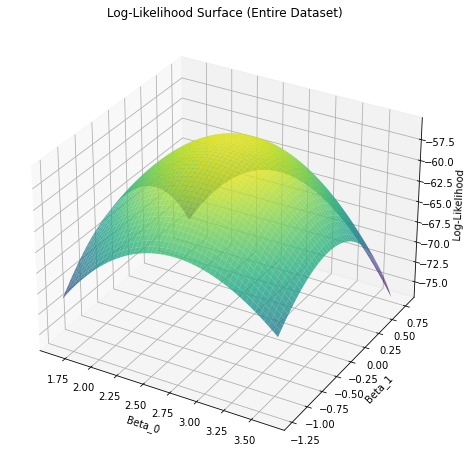

In [40]:
X_scaled = scaler.fit_transform(X) # Scale the ENTIRE dataset

def gradient_ascent_wpath(X, y, learning_rate=0.01, num_iterations=1000, lambda_reg=0.0):
    beta = np.zeros(X.shape[1])
    log_likelihoods = []
    beta_path = []
    beta_path.append(beta.copy())
    for _ in range(num_iterations):
        grad = compute_gradient(X, y, beta, lambda_reg)
        beta = beta + learning_rate * grad
        ll = log_likelihood(X, y, beta, lambda_reg)
        log_likelihoods.append(ll)
        beta_path.append(beta.copy())
    return beta, log_likelihoods, beta_path

# Add intercept term
X_custom = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Perform gradient ascent on the entire dataset
learning_rate = 0.01
num_iterations = 1000
lambda_reg = 0.1
initial_beta = np.zeros(X_custom.shape[1])
optimized_beta, log_likelihoods, beta_path = gradient_ascent_wpath(X_custom, y, learning_rate, 
                                                                   num_iterations, lambda_reg)


def visualize_log_likelihood_surface(X, y, optimized_beta, log_likelihood):
    # Select two coefficients
    beta_0_index = 0  # Intercept
    beta_1_index = 1  # First feature

    # Create a grid of values for the selected coefficients
    beta_0_vals = np.linspace(optimized_beta[beta_0_index] - 1, optimized_beta[beta_0_index] + 1, 50)
    beta_1_vals = np.linspace(optimized_beta[beta_1_index] - 1, optimized_beta[beta_1_index] + 1, 50)
    beta_0_grid, beta_1_grid = np.meshgrid(beta_0_vals, beta_1_vals)

    # Calculate log-likelihood values for each combination
    log_likelihood_grid = np.zeros_like(beta_0_grid)
    for i in range(beta_0_grid.shape[0]):
        for j in range(beta_0_grid.shape[1]):
            beta_temp = optimized_beta.copy()
            beta_temp[beta_0_index] = beta_0_grid[i, j]
            beta_temp[beta_1_index] = beta_1_grid[i, j]
            log_likelihood_grid[i, j] = log_likelihood(X, y, beta_temp)

    # Plot the log-likelihood surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(beta_0_grid, beta_1_grid, log_likelihood_grid, cmap='viridis', alpha=0.8)

    # Set labels and title
    ax.set_xlabel(f'Beta_{beta_0_index}')
    ax.set_ylabel(f'Beta_{beta_1_index}')
    ax.set_zlabel('Log-Likelihood')
    ax.set_title('Log-Likelihood Surface (Entire Dataset)')
    plt.show()


# Call the function
visualize_log_likelihood_surface(X_custom, y, optimized_beta, log_likelihood)

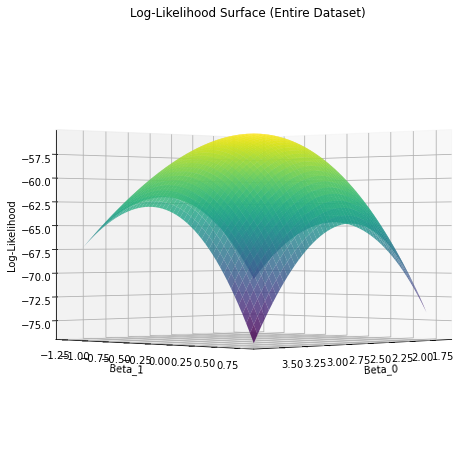

In [42]:
def visualize_log_likelihood_surface2(X, y, optimized_beta, log_likelihood, elev=30, azim=4):
    # Select two coefficients
    beta_0_index = 0  # Intercept
    beta_1_index = 1  # First feature

    # Create a grid of values for the selected coefficients
    beta_0_vals = np.linspace(optimized_beta[beta_0_index] - 1, optimized_beta[beta_0_index] + 1, 50)
    beta_1_vals = np.linspace(optimized_beta[beta_1_index] - 1, optimized_beta[beta_1_index] + 1, 50)
    beta_0_grid, beta_1_grid = np.meshgrid(beta_0_vals, beta_1_vals)

    # Calculate log-likelihood values for each combination
    log_likelihood_grid = np.zeros_like(beta_0_grid)
    for i in range(beta_0_grid.shape[0]):
        for j in range(beta_0_grid.shape[1]):
            beta_temp = optimized_beta.copy()
            beta_temp[beta_0_index] = beta_0_grid[i, j]
            beta_temp[beta_1_index] = beta_1_grid[i, j]
            log_likelihood_grid[i, j] = log_likelihood(X, y, beta_temp)

    # Plot the log-likelihood surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(beta_0_grid, beta_1_grid, log_likelihood_grid, cmap='viridis', alpha=0.8)

    # Set labels and title
    ax.set_xlabel(f'Beta_{beta_0_index}')
    ax.set_ylabel(f'Beta_{beta_1_index}')
    ax.set_zlabel('Log-Likelihood')
    ax.set_title('Log-Likelihood Surface (Entire Dataset)')
    
    # SET ELEVATION AND AZIMUTH
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()


# Call the function
visualize_log_likelihood_surface2(X_custom, y, optimized_beta, log_likelihood, elev=0, azim=45)

#### Visualizing Likelihood Surface of the training dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


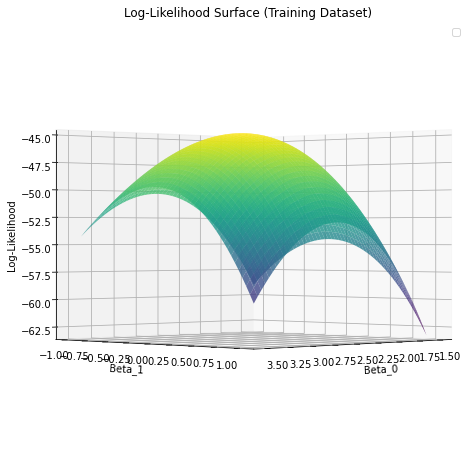

In [38]:
# Add intercept term to X_train
X_train_custom = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

initial_beta = np.zeros(X_train_custom.shape[1])

optimized_beta, log_likelihoods, beta_path = gradient_ascent_wpath(X_train_custom, y_train, learning_rate, num_iterations, lambda_reg)

# Visualization of Log-Likelihood Surface
def visualize_log_likelihood(X, y, beta_path, log_likelihood, learning_rate = 0.01, num_iterations = 1000, lambda_reg = 0.1, elev=30, azim=45):

  #Visualizes the log-likelihood surface for two selected coefficients
  #and plots the gradient ascent path.

  # Select two coefficients for visualization (e.g., intercept and the first feature)
    beta_0_index = 0  # Intercept
    beta_1_index = 1  # First feature

  # Create a grid of values for the selected coefficients
    beta_0_vals = np.linspace(np.mean([b[beta_0_index] for b in beta_path]) - 1, np.mean([b[beta_0_index] for b in beta_path]) + 1, 50)
    beta_1_vals = np.linspace(np.mean([b[beta_1_index] for b in beta_path]) - 1, np.mean([b[beta_1_index] for b in beta_path]) + 1, 50)
    beta_0_grid, beta_1_grid = np.meshgrid(beta_0_vals, beta_1_vals)

  # Calculate log-likelihood values for each combination of beta_0 and beta_1
    log_likelihood_grid = np.zeros_like(beta_0_grid)
    for i in range(beta_0_grid.shape[0]):
        for j in range(beta_0_grid.shape[1]):
            beta_temp = optimized_beta.copy()
            beta_temp[beta_0_index] = beta_0_grid[i, j]
            beta_temp[beta_1_index] = beta_1_grid[i, j]
            log_likelihood_grid[i, j] = log_likelihood(X, y, beta_temp, lambda_reg)

  # Plot the log-likelihood surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(beta_0_grid, beta_1_grid, log_likelihood_grid, cmap='viridis', alpha=0.8)


  # Set labels and title
    ax.set_xlabel(f'Beta_{beta_0_index}')
    ax.set_ylabel(f'Beta_{beta_1_index}')
    ax.set_zlabel('Log-Likelihood')
    ax.set_title('Log-Likelihood Surface (Training Dataset)')
    ax.legend()
    
    # Set viewing angle
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()


visualize_log_likelihood(X_train_custom, y_train, beta_path, log_likelihood, 
                         learning_rate = 0.01, num_iterations = 1000, lambda_reg = 0.1, elev=0, azim=45)


#### Visualizing Likelihood Surface of the training dataset with gradient ascent path

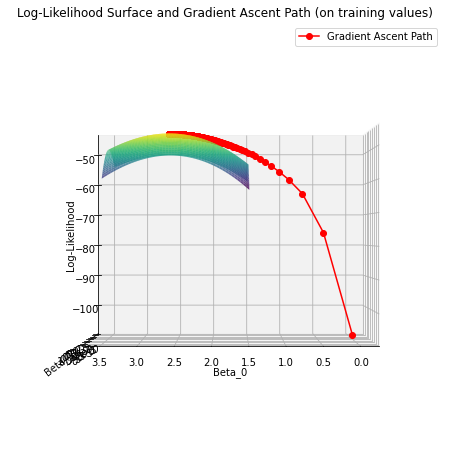

In [39]:
optimized_beta, log_likelihoods, beta_path = gradient_ascent_wpath(X_train_custom, y_train, learning_rate, num_iterations, lambda_reg)

# Visualization of Log-Likelihood Surface
def visualize_log_likelihood_wpath(X, y, beta_path, log_likelihood, learning_rate = 0.01, num_iterations = 1000, lambda_reg = 0.1, elev=30, azim=45):

  #Visualizes the log-likelihood surface for two selected coefficients
  #and plots the gradient ascent path.

  # Select two coefficients for visualization (e.g., intercept and the first feature)
    beta_0_index = 0  # Intercept
    beta_1_index = 1  # First feature

  # Create a grid of values for the selected coefficients
    beta_0_vals = np.linspace(np.mean([b[beta_0_index] for b in beta_path]) - 1, np.mean([b[beta_0_index] for b in beta_path]) + 1, 50)
    beta_1_vals = np.linspace(np.mean([b[beta_1_index] for b in beta_path]) - 1, np.mean([b[beta_1_index] for b in beta_path]) + 1, 50)
    beta_0_grid, beta_1_grid = np.meshgrid(beta_0_vals, beta_1_vals)

  # Calculate log-likelihood values for each combination of beta_0 and beta_1
    log_likelihood_grid = np.zeros_like(beta_0_grid)
    for i in range(beta_0_grid.shape[0]):
        for j in range(beta_0_grid.shape[1]):
            beta_temp = optimized_beta.copy()
            beta_temp[beta_0_index] = beta_0_grid[i, j]
            beta_temp[beta_1_index] = beta_1_grid[i, j]
            log_likelihood_grid[i, j] = log_likelihood(X, y, beta_temp, lambda_reg)

  # Plot the log-likelihood surface
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(beta_0_grid, beta_1_grid, log_likelihood_grid, cmap='viridis', alpha=0.8)

  # Extract the path of beta_0 and beta_1 from beta_path
    beta_path_array = np.array(beta_path)
    beta_0_path = beta_path_array[:, beta_0_index]
    beta_1_path = beta_path_array[:, beta_1_index]

  # Get the log-likelihood values for each beta in the path
    log_likelihoods_path = [log_likelihood(X, y, beta_val, lambda_reg) for beta_val in beta_path]

  # Plot the gradient ascent path
    ax.plot(beta_0_path, beta_1_path, log_likelihoods_path, color='red', marker='o', linestyle='-', label='Gradient Ascent Path')

  # Set labels and title
    ax.set_xlabel(f'Beta_{beta_0_index}')
    ax.set_ylabel(f'Beta_{beta_1_index}')
    ax.set_zlabel('Log-Likelihood')
    ax.set_title('Log-Likelihood Surface and Gradient Ascent Path (on training values)')
    ax.legend()
    
    # Set viewing angle
    ax.view_init(elev=elev, azim=azim)
    
    plt.show()


visualize_log_likelihood_wpath(X_train_custom, y_train, beta_path, log_likelihood, 
                         learning_rate = 0.01, num_iterations = 1000, lambda_reg = 0.1, elev=0, azim=90)
